# Sports revenue analysis
Sports clothing and athleisure attire is a huge industry, worth approximately $193 billion in 2021 with a strong growth forecast over the next decade!

In this notebook, we play the role of a product analyst for an online sports clothing company. The company is specifically interested in how it can improve revenue. We will dive into product data such as pricing, reviews, descriptions, and ratings, as well as revenue and website traffic, to produce recommendations for its marketing and sales teams.

The database provided to us, sports, contains five tables, with product_id being the primary key for all of them|

In [1]:
# importing necessary tables

import mysql.connector
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# connecting to mysql server
conn=mysql.connector.connect(host='localhost', password='#',user='root',db='sports')
# creating a cursor
cursor=conn.cursor()
engine = create_engine('mysql+mysqlconnector://root:#@localhost/sports', echo=False)

In [3]:
# creating data frames
brands=pd.read_sql("SELECT * FROM brands",conn )
finance=pd.read_sql("SELECT * FROM finance",conn )
info=pd.read_sql("SELECT * FROM info_desc",conn )
reviews=pd.read_sql("SELECT * FROM reviews",conn )
traffic=pd.read_sql("SELECT * FROM traffic",conn )

C:\Users\THE_DE_V_IL\AppData\Local\Temp\ipykernel_11572\2393041987.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  brands=pd.read_sql("SELECT * FROM brands",conn )
C:\Users\THE_DE_V_IL\AppData\Local\Temp\ipykernel_11572\2393041987.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  finance=pd.read_sql("SELECT * FROM finance",conn )
C:\Users\THE_DE_V_IL\AppData\Local\Temp\ipykernel_11572\2393041987.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  info=pd.read_sql("SELECT * FROM info_desc",conn )
C:\Users\THE_DE_V_IL\A

In [4]:
# Data exploration

In [5]:
brands.head()

,product_id,brand
0,G27341,Adidas
1,CM0081,Adidas
2,B44832,Adidas
3,D98205,Adidas
4,B75586,Adidas


In [6]:
finance.head()

,product_id,listing_price,sale_price,discount,revenue
0,G27341,75.99,37.99,0.5,1641.17
1,CM0081,9.99,5.99,0.4,398.93
2,B44832,69.99,34.99,0.5,2204.37
3,D98205,79.99,39.99,0.5,5182.70
4,B75586,47.99,19.20,0.6,1555.20


In [7]:
traffic.head()

,product_id,last_visited
0,G27341,2029-11-18 16:16:00
1,CM0081,2001-02-18 10:27:00
2,B44832,2007-09-18 20:06:00
3,D98205,2018-07-19 15:26:00
4,B75586,2030-01-19 12:09:00


In [8]:
reviews.head()

,product_id,rating,reviews
0,G27341,3.3,24.0
1,CM0081,2.6,37.0
2,B44832,4.1,35.0
3,D98205,3.5,72.0
4,B75586,1.0,45.0


In [9]:
info.head()

,product_name,product_id,description
0,None,AH2430,None
1,Women's adidas Originals Sleek Shoes,G27341,"A modern take on adidas sport heritage, tailor..."
2,Women's adidas Swim Puka Slippers,CM0081,These adidas Puka slippers for women's come wi...
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,"Inspired by modern tech runners, these women's..."
4,Women's adidas Originals Taekwondo Shoes,D98205,This design is inspired by vintage Taekwondo s...


In [10]:
# finance is our fact table and product_id as primary key

In [11]:
# this is a way to merge all the tables with primary key being product_id, we can also use pd.merge for the same output.
dfs_to_join = [brands, info, traffic, reviews, finance]
sports_df = brands.copy()
for df in dfs_to_join[1:]:
    sports_df = sports_df.merge(df, on='product_id', how='inner')

In [12]:
sports_df.head()

,product_id,brand,product_name,description,last_visited,rating,reviews,listing_price,sale_price,discount,revenue
0,G27341,Adidas,Women's adidas Originals Sleek Shoes,"A modern take on adidas sport heritage, tailor...",2029-11-18 16:16:00,3.3,24.0,75.99,37.99,0.5,1641.17
1,CM0081,Adidas,Women's adidas Swim Puka Slippers,These adidas Puka slippers for women's come wi...,2001-02-18 10:27:00,2.6,37.0,9.99,5.99,0.4,398.93
2,B44832,Adidas,Women's adidas Sport Inspired Questar Ride Shoes,"Inspired by modern tech runners, these women's...",2007-09-18 20:06:00,4.1,35.0,69.99,34.99,0.5,2204.37
3,D98205,Adidas,Women's adidas Originals Taekwondo Shoes,This design is inspired by vintage Taekwondo s...,2018-07-19 15:26:00,3.5,72.0,79.99,39.99,0.5,5182.70
4,B75586,Adidas,Women's adidas Sport Inspired Duramo Lite 2.0 ...,Refine your interval training in these women's...,2030-01-19 12:09:00,1.0,45.0,47.99,19.20,0.6,1555.20


In [13]:
sports_df.brand.value_counts()

Adidas    2575
Nike       545
Name: brand, dtype: int64

In [14]:
sports_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3120 entries, 0 to 3119
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   product_id     3120 non-null   object        
 1   brand          3120 non-null   object        
 2   product_name   3120 non-null   object        
 3   description    3117 non-null   object        
 4   last_visited   2876 non-null   datetime64[ns]
 5   rating         3120 non-null   float64       
 6   reviews        3120 non-null   float64       
 7   listing_price  3120 non-null   float64       
 8   sale_price     3120 non-null   float64       
 9   discount       3120 non-null   float64       
 10  revenue        3120 non-null   float64       
dtypes: datetime64[ns](1), float64(6), object(4)
memory usage: 292.5+ KB


In [15]:
# data types seems corret, but has missing values


In [16]:
sports_df.describe()

,rating,reviews,listing_price,sale_price,discount,revenue
count,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000
mean,3.265801,41.545513,69.719455,60.103035,0.276090,3951.571263
std,1.392685,31.361668,46.586909,41.906852,0.224955,4440.312551
min,0.000000,0.000000,0.000000,4.490000,0.000000,0.000000
25%,2.600000,12.000000,45.990000,29.990000,0.000000,863.890000
50%,3.500000,39.000000,59.990000,45.990000,0.400000,2735.280000
75%,4.400000,69.000000,89.990000,77.990000,0.500000,5345.015000
max,5.000000,223.000000,299.990000,365.000000,0.600000,64203.930000


In [17]:
# There are more than 25% of products with no discount

In [18]:
sports_df.isnull().sum()

product_id         0
brand              0
product_name       0
description        3
last_visited     244
rating             0
reviews            0
listing_price      0
sale_price         0
discount           0
revenue            0
dtype: int64

In [19]:
sports_df[sports_df.description.isnull()]

,product_id,brand,product_name,description,last_visited,rating,reviews,listing_price,sale_price,discount,revenue
2727,CD4371-001,Nike,Nike React Infinity Run Flyknit,None,2001-05-19 05:55:00,4.6,68.0,0.0,139.95,0.0,17129.88
2826,CD4372-004,Nike,Nike React Infinity Run Flyknit,None,2012-01-19 12:17:00,4.2,29.0,0.0,139.95,0.0,7305.39
3030,CD8526-446,Nike,Nike Free X Metcon 2,None,2019-07-18 23:15:00,3.0,7.0,0.0,99.95,0.0,1259.37


In [20]:
sports_df['description'] = sports_df.groupby('product_name')['description'].apply(lambda x: x.fillna(method='ffill'))

C:\Users\THE_DE_V_IL\AppData\Local\Temp\ipykernel_11572\737745603.py:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  sports_df['description'] = sports_df.groupby('product_name')['description'].apply(lambda x: x.fillna(method='ffill'))


In [21]:
sports_df[sports_df.description.isnull()]

,product_id,brand,product_name,description,last_visited,rating,reviews,listing_price,sale_price,discount,revenue
2727,CD4371-001,Nike,Nike React Infinity Run Flyknit,None,2001-05-19 05:55:00,4.6,68.0,0.0,139.95,0.0,17129.88
2826,CD4372-004,Nike,Nike React Infinity Run Flyknit,None,2012-01-19 12:17:00,4.2,29.0,0.0,139.95,0.0,7305.39


In [22]:
# i think we have to manually fill these,i have the description copied of the products from internet, this is actually not a necessary step, but i'm doing it anyway.
sports_df.description.fillna("The Nike React Infinity Run Flyknit is a running shoe from Nike that features a Flyknit upper, a React foam midsole, and a rubber outsole. The shoe is marketed as a comfortable and supportive option for daily training and long-distance running.",inplace=True)


In [23]:
# creating categories

In [24]:
# creating gender category
def get_gender(row):
    text = str(row['description']) + ' ' + str(row['product_name'])
    if any(word in text.lower() for word in ['women', 'female', 'girl','woman']):
        return 'female'
    elif any(word in text.lower() for word in ['men', 'male', 'boy','man']):
        return 'male'
    else:
        return 'common'

sports_df['gender'] = sports_df.apply(lambda row: get_gender(row), axis=1)


In [25]:
# Define the keywords for footwear products
footwear_keywords = ["shoe","foot", "slipper"]

# Create a new column named "type" in the sports table
sports_df.loc[sports_df["description"].str.contains('|'.join(footwear_keywords),case=False), "type"] = "footwear"
sports_df.loc[~sports_df["description"].str.contains('|'.join(footwear_keywords),case=False), "type"] = "clothing"



In [26]:
sports_df["type"].value_counts()

footwear    2701
clothing     419
Name: type, dtype: int64

In [29]:
sports_df.to_sql('sports_df',engine,if_exists='replace')

3120

In [30]:
sports_df.columns

Index(['product_id', 'brand', 'product_name', 'description', 'last_visited',
       'rating', 'reviews', 'listing_price', 'sale_price', 'discount',
       'revenue', 'gender', 'type'],
      dtype='object')

# SQL QUERIES

In [31]:

# creating price category
price_cat=pd.read_sql("""SELECT brand, COUNT(product_id) as count,SUM(revenue) as total_revenue,
cASE
WHEN listing_price < 43 THEN 'Budget'
WHEN listing_price <74 THEN 'Average'
WHEN listing_price <129 THEN 'Expensive'
WHEN listing_price>129 THEN 'Elite'
END AS price_category
FROM sports_df
GROUP BY brand,price_category
ORDER BY total_revenue DESC;
""", conn)
price_cat

C:\Users\THE_DE_V_IL\AppData\Local\Temp\ipykernel_11572\3987131563.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  price_cat=pd.read_sql("""SELECT brand, COUNT(product_id) as count,SUM(revenue) as total_revenue,


,brand,count,total_revenue,price_category
0,Adidas,849,4626980.07,Expensive
1,Adidas,1009,3128834.39,Average
2,Adidas,307,3014316.83,Elite
3,Adidas,410,756487.79,Budget
4,Nike,357,595341.02,Budget
5,Nike,82,128475.59,Elite
6,Nike,90,71843.15,Expensive
7,Nike,16,6623.50,Average


In [32]:
# As you can see, Most sold products by nike are within budget
# Adidas expensive category has the highest revenue

In [90]:


Monthly_reviews=pd.read_sql("""SELECT brand, MONTH(last_visited) as month, COUNT(product_id) as num_reviews, SUM(revenue) as total_revenue
FROM sports_df
WHERE MONTH(last_visited) IS NOT NULL
GROUP BY brand, month
ORDER BY brand,month;""" , conn)
Monthly_reviews

C:\Users\THE_DE_V_IL\AppData\Local\Temp\ipykernel_11572\311966146.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  Monthly_reviews=pd.read_sql("""SELECT brand, MONTH(last_visited) as month, COUNT(product_id) as num_reviews, SUM(revenue) as total_revenue


,brand,month,num_reviews,total_revenue
0,Adidas,1,253,1085801.88
1,Adidas,2,272,1153606.20
2,Adidas,3,269,1160076.93
3,Adidas,4,180,854969.43
4,Adidas,5,172,708602.14
5,Adidas,6,159,727417.50
6,Adidas,7,170,779534.42
7,Adidas,8,189,889346.96
8,Adidas,9,181,879667.36
9,Adidas,10,192,908125.19


Looks like product reviews are highest in the first quarter of the calendar year, so there is scope to run experiments aiming to increase the volume of reviews in the other nine months!

In [34]:

# checking for revenue by type
sports_type=pd.read_sql("""SELECT brand, type, SUM(revenue) as total_revenue, COUNT(product_id) as count
FROM sports_df
GROUP BY brand, type
ORDER BY brand,type;""" , conn)
sports_type

C:\Users\THE_DE_V_IL\AppData\Local\Temp\ipykernel_11572\732571619.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  sports_type=pd.read_sql("""SELECT brand, type, SUM(revenue) as total_revenue, COUNT(product_id) as count


,brand,type,total_revenue,count
0,Adidas,clothing,555479.47,123
1,Adidas,footwear,10971139.61,2452
2,Nike,clothing,436336.82,296
3,Nike,footwear,365946.44,249


In [35]:
# It seems that maojority of adidas is footwears, nike maintains clothing and footwear sales

In [36]:
# we can visualize these later

# Visualizations


Text(0, 0.5, 'Number of Products')

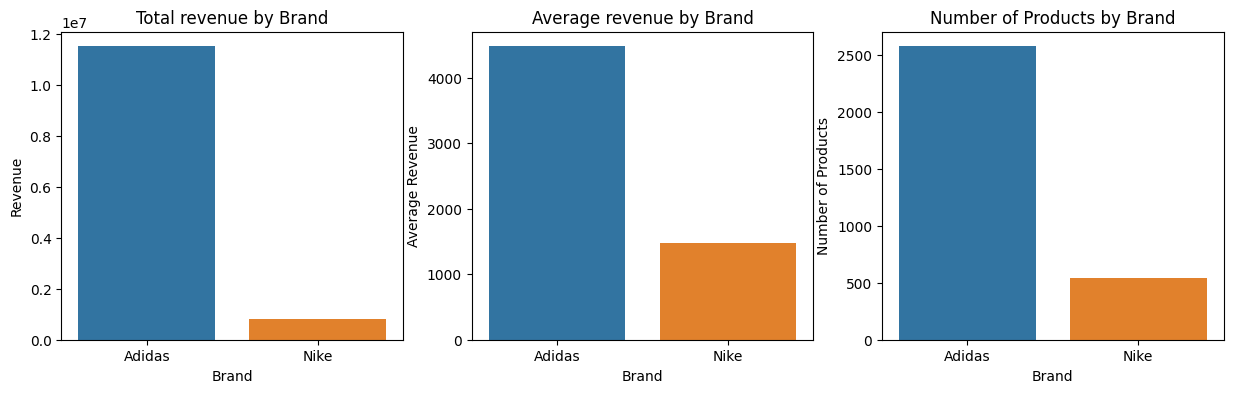

In [52]:
revenue_per_brand = sports_df.groupby('brand')['revenue'].sum().reset_index()
avg_revenue_per_brand =  sports_df.groupby('brand')['revenue'].mean().reset_index()
count_per_brand = sports_df.groupby('brand')['product_id'].count().reset_index()

# Create the bar plot
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=[15, 4])
sns.barplot(x='brand', y='revenue', data=revenue_per_brand, ax=ax1)

# Set the plot title and axis labels
ax1.set_title('Total revenue by Brand')
ax1.set_xlabel('Brand')
ax1.set_ylabel('Revenue')

sns.barplot(x='brand', y='revenue', data=avg_revenue_per_brand, ax=ax2)

# Set the plot title and axis labels
ax2.set_title('Average revenue by Brand')
ax2.set_xlabel('Brand')
ax2.set_ylabel('Average Revenue')

sns.barplot(x='brand', y='product_id', data=count_per_brand, ax=ax3)

# Set the plot title and axis labels
ax3.set_title('Number of Products by Brand')
ax3.set_xlabel('Brand')
ax3.set_ylabel('Number of Products')


In [55]:
# Nike has very low sale, poor revenue, and average revnue product

In [ ]:
nike = SPORT_TABLE.loc[SPORT_TABLE['brand'] == 'Nike']
adidas= SPORT_TABLE.loc[SPORT_TABLE['brand'] == 'Adidas']


# DISTRIBUTION PLOTS


<AxesSubplot: xlabel='sale_price', ylabel='Count'>

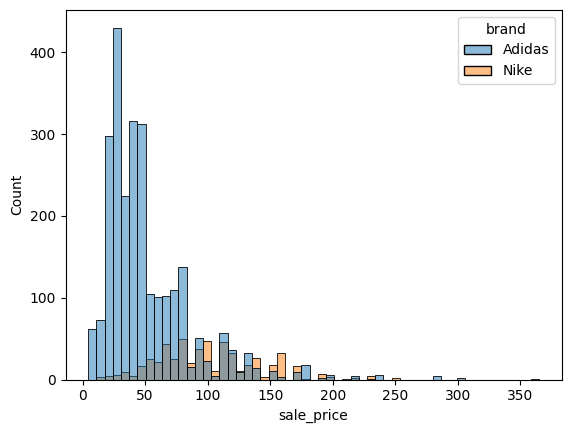

In [56]:
sns.histplot(x='sale_price',data=sports_df,hue='brand')

In [58]:
# sale_price is heavily right skewed

<AxesSubplot: xlabel='rating', ylabel='Count'>

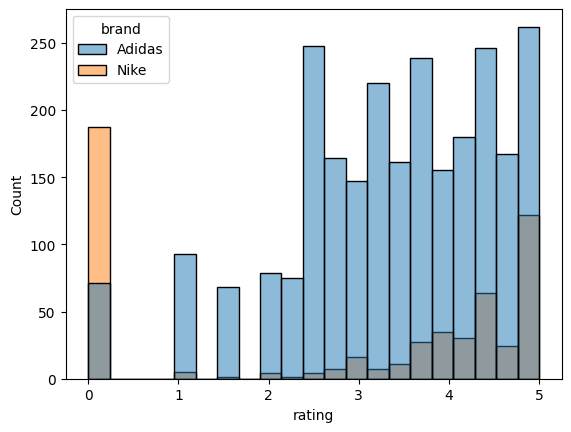

In [59]:
sns.histplot(x='rating',data=sports_df,hue='brand')

In [60]:
# Mixed ratings for adidas, nike has a lot of worst rating and some good ones

<AxesSubplot: xlabel='discount', ylabel='Count'>

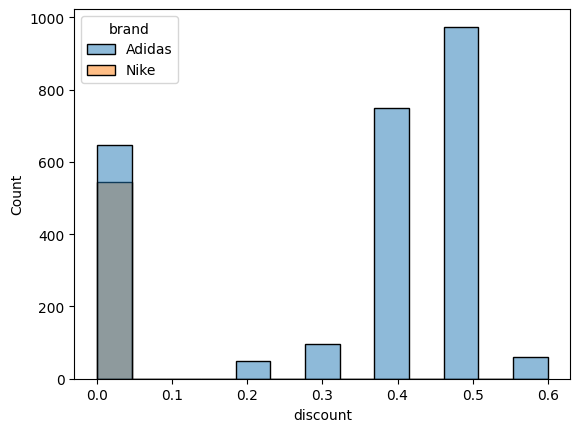

In [61]:
sns.histplot(x='discount',data=sports_df,hue='brand')

In [62]:
# nike has no discount, most adidas discount are of 50%

<AxesSubplot: xlabel='brand', ylabel='sale_price'>

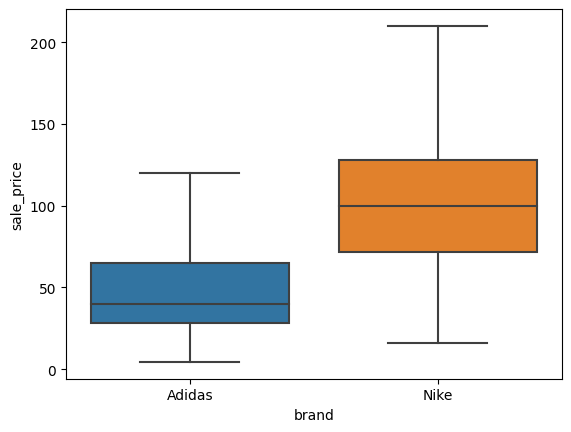

In [63]:
sns.boxplot(x='brand',y='sale_price',data=sports_df,sym='')  

In [64]:
# Nike has high sales value range

### Sales by type

In [69]:
sports_type

,brand,type,total_revenue,count
0,Adidas,clothing,555479.47,123
1,Adidas,footwear,10971139.61,2452
2,Nike,clothing,436336.82,296
3,Nike,footwear,365946.44,249


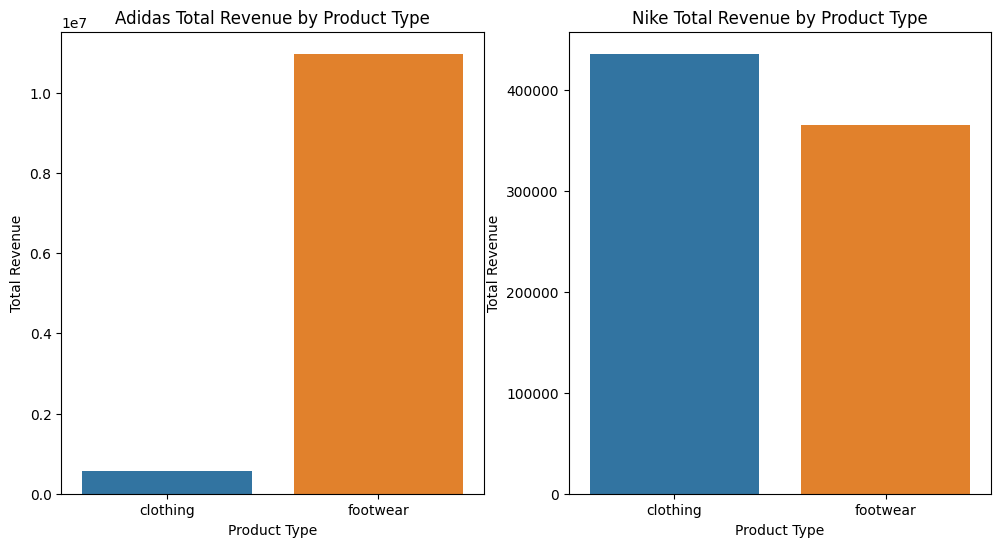

In [81]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=[12,6])

sns.barplot(x='type',y='total_revenue',data=sports_type[sports_type.brand=='Adidas'],ax=ax1)
sns.barplot(x='type',y='total_revenue',data=sports_type[sports_type.brand=='Nike'],ax=ax2)
ax1.set_title('Adidas Total Revenue by Product Type')
ax1.set_xlabel('Product Type')
ax1.set_ylabel('Total Revenue')
ax2.set_title('Nike Total Revenue by Product Type')
ax2.set_xlabel('Product Type')
ax2.set_ylabel('Total Revenue')
plt.show()

In [79]:
# we have already seen that the Adidas has low clothing products while Nike has maintained both categories

<AxesSubplot: xlabel='brand', ylabel='revenue'>

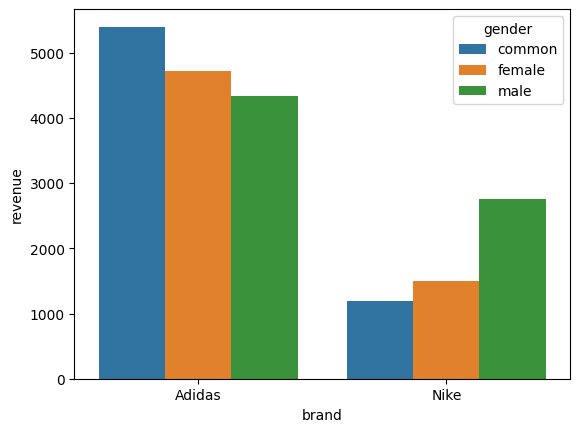

In [82]:
mean_rev_gen= sports_df.groupby(['brand','gender'])['revenue'].mean().reset_index()
sns.barplot(x='brand',y='revenue',data=mean_rev_gen,hue='gender')

In [84]:
#The most peoples who buys products from nike are males, Adidas provides More common/unisex type products

<AxesSubplot: xlabel='listing_price', ylabel='sale_price'>

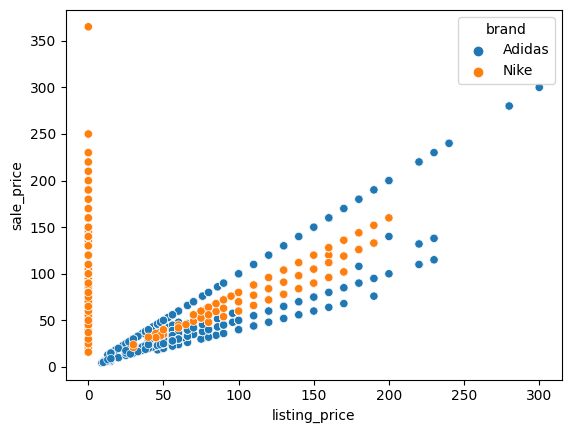

In [85]:
sns.scatterplot(x='listing_price',y='sale_price',data=sports_df,hue='brand')

In [86]:
# nike has lot of products with listing price as 0, one reason for this is, since they dont provide discount, they restrict the listing price to be hidden.

In [96]:
Monthly_reviews.head()

,brand,month,num_reviews,total_revenue
0,Adidas,1,253,1085801.88
1,Adidas,2,272,1153606.20
2,Adidas,3,269,1160076.93
3,Adidas,4,180,854969.43
4,Adidas,5,172,708602.14


Text(0.5, 1.0, 'Adidas Sales per month')

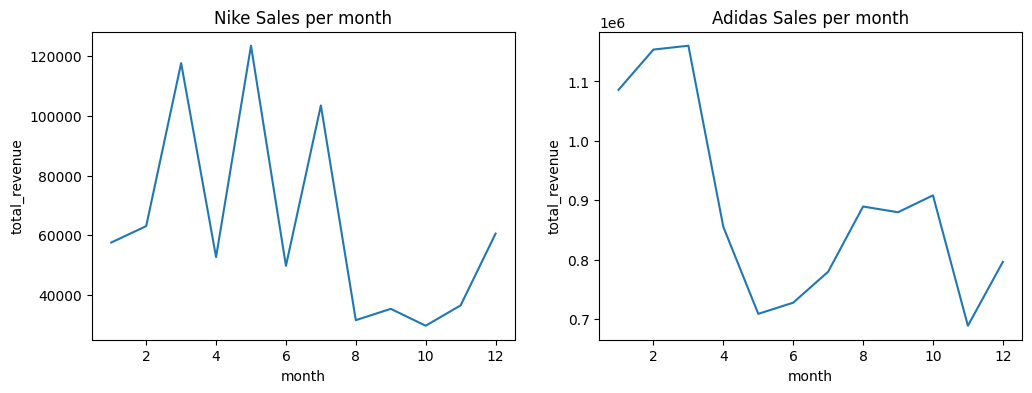

In [101]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=[12,4])

sns.lineplot(x='month',y='total_revenue',data=Monthly_reviews[Monthly_reviews.brand=='Nike'],ax=ax1)

sns.lineplot(x='month',y='total_revenue',data=Monthly_reviews[Monthly_reviews.brand=='Adidas'],ax=ax2)

ax1.set_title('Nike Sales per month')

ax2.set_title('Adidas Sales per month')

In [ ]:
# First half more sales 

Text(0.5, 1.0, 'Adidas reviews per month')

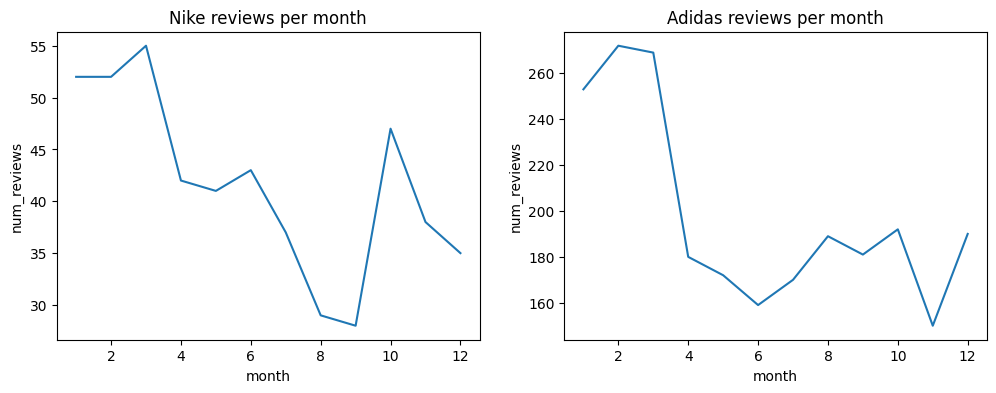

In [104]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=[12,4])

sns.lineplot(x='month',y='num_reviews',data=Monthly_reviews[Monthly_reviews.brand=='Nike'],ax=ax1)

sns.lineplot(x='month',y='num_reviews',data=Monthly_reviews[Monthly_reviews.brand=='Adidas'],ax=ax2)

ax1.set_title('Nike reviews per month')

ax2.set_title('Adidas reviews per month')

In [105]:
# similarly the reviews are very high at the first quarter

# brands BY PRICE CATEGORY

In [108]:
price_cat

,brand,count,total_revenue,price_category
0,Adidas,849,4626980.07,Expensive
1,Adidas,1009,3128834.39,Average
2,Adidas,307,3014316.83,Elite
3,Adidas,410,756487.79,Budget
4,Nike,357,595341.02,Budget
5,Nike,82,128475.59,Elite
6,Nike,90,71843.15,Expensive
7,Nike,16,6623.50,Average


<AxesSubplot: xlabel='price_category', ylabel='count'>

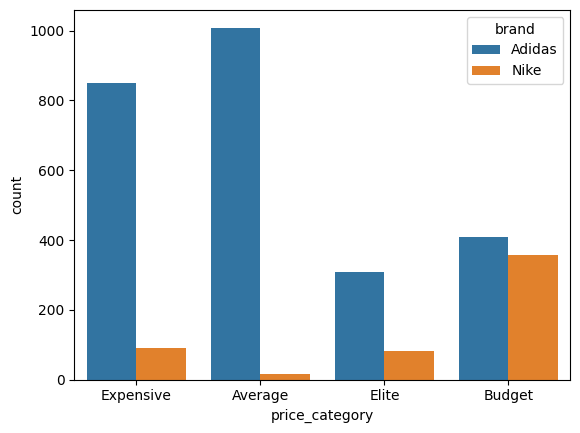

In [110]:
sns.barplot(y='count',data=price_cat,x='price_category',hue='brand')

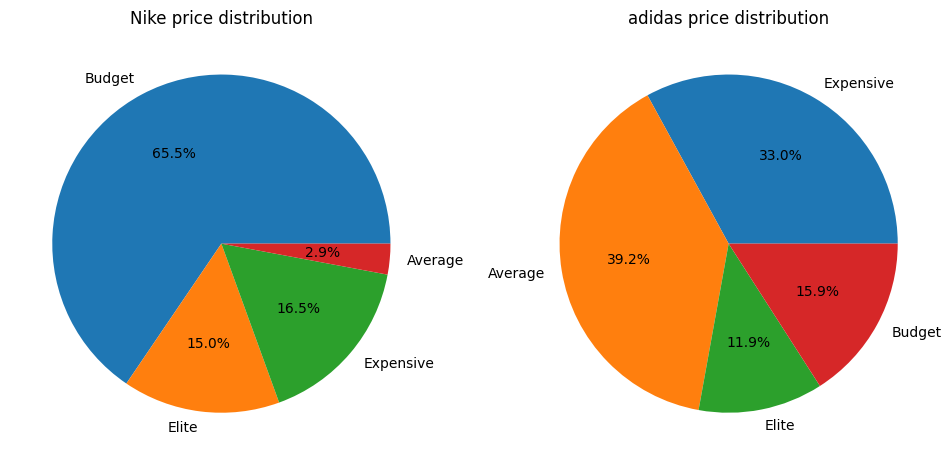

In [120]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=[12,6])
ax1.pie(price_cat['count'][price_cat.brand=='Nike'], labels=price_cat.price_category[price_cat.brand=='Nike'], autopct='%1.1f%%')
ax1.set_title('Nike price distribution')
ax2.pie(price_cat['count'][price_cat.brand=='Adidas'], labels=price_cat.price_category[price_cat.brand=='Adidas'], autopct='%1.1f%%')
ax2.set_title('adidas price distribution')
plt.show()

In [121]:
# Here we can analyze Nike has Major proportion of peoducts in budget category
# Even though its expensive, lot of people buy products from adidas
# Nike has sold about 31.5% of expensive and elite products combined

In [114]:
conn.commit()
conn.close()